# 천만관객 영화 분석

In [351]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math
import seaborn as sns
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
data = pd.read_csv('./역대영화+필모그래피.csv')
data

,영화명,배급사,개봉일,매출액,관객수,제작연도,장르
0,1987,(주)씨제이이엔엠,2017-12-27,58170216145,7232452,2017.0,드라마
1,2012,한국소니픽쳐스릴리징브에나비스타영화㈜,2009-11-12,38941723000,5397597,2009.0,"SF,액션,어드벤처"
2,7급 공무원,롯데쇼핑㈜롯데엔터테인먼트,2009-04-22,26380710000,4039891,2008.0,"코미디,액션,드라마,범죄"
3,7번방의 선물,(주)넥스트엔터테인먼트월드(NEW),2013-01-23,91437368170,12812144,2012.0,"코미디,드라마"
4,82년생 김지영,롯데컬처웍스(주)롯데엔터테인먼트,2019-10-23,30306859310,3679162,2019.0,드라마
...,...,...,...,...,...,...,...
195,해적: 바다로 간 산적,롯데쇼핑㈜롯데엔터테인먼트,2014-08-06,66372140706,8666208,2014.0,어드벤처
196,헌트,플러스엠 엔터테인먼트,2022-08-10,44601068153,4352420,2020.0,"액션,공포(호러),스릴러"
197,혹성탈출: 반격의 서막,이십세기폭스코리아(주),2014-07-10,31514053095,4002560,2014.0,"액션,드라마,SF,스릴러"
198,화려한 휴가,CJ ENM,2007-07-25,44098824600,6855433,2007.0,드라마


In [12]:
# 결측값 왕의 남자 장르 추가
data = data.fillna('사극')

# 역대 영화 중 1000만 관객을 달성한 영화 추출

In [13]:
mv_1000_data = data[data['관객수'] >= 10000000]
mv_1000_data.sort_values('관객수', ascending=False, inplace=True)
mv_1000_data

,영화명,배급사,개봉일,매출액,관객수,제작연도,장르
64,명량,(주)씨제이이엔엠,2014-07-30,135758658810,17615919,2013.0,"사극,액션"
28,극한직업,(주)씨제이이엔엠,2019-01-23,139655543516,16266338,2018.0,코미디
105,신과함께-죄와 벌,롯데쇼핑㈜롯데엔터테인먼트,2017-12-20,115727528087,14414658,2017.0,"판타지,드라마"
24,국제시장,(주)씨제이이엔엠,2014-12-17,110947621230,14264478,2014.0,드라마
129,어벤져스: 엔드게임,월트디즈니컴퍼니코리아 유한책임회사,2019-04-24,122492181020,13977602,2018.0,"액션,SF"
13,겨울왕국 2,월트디즈니컴퍼니코리아 유한책임회사,2019-11-21,114843932550,13750668,2019.0,애니메이션
85,베테랑,(주)씨제이이엔엠,2015-08-05,105170856250,13414484,2014.0,"액션,드라마"
113,아바타,"주식회사 해리슨앤컴퍼니,이십세기폭스코리아(주)",2009-12-17,125304346000,13338863,2009.0,"SF,액션,어드벤처"
51,도둑들,(주)쇼박스,2012-07-25,93672497700,12984701,2012.0,"액션,범죄"
3,7번방의 선물,(주)넥스트엔터테인먼트월드(NEW),2013-01-23,91437368170,12812144,2012.0,"코미디,드라마"


In [95]:
mv_1000_data['배급사'].value_counts()

(주)씨제이이엔엠                            6
월트디즈니컴퍼니코리아 유한책임회사                   5
(주)쇼박스                               4
(주)넥스트엔터테인먼트월드(NEW)                  3
롯데쇼핑㈜롯데엔터테인먼트                        1
주식회사 해리슨앤컴퍼니,이십세기폭스코리아(주)            1
주식회사 에이비오엔터테인먼트,플러스엠 엔터테인먼트          1
롯데컬처웍스(주)롯데엔터테인먼트                    1
CJ ENM                               1
(주)시네마서비스                            1
월트디즈니컴퍼니코리아 유한책임회사,월트디즈니컴퍼니코리아(주)    1
워너브러더스 코리아(주)                        1
소니픽쳐스릴리징월트디즈니스튜디오스코리아(주)             1
Name: 배급사, dtype: int64

In [96]:
dra = 0 # 드라마
sf = 0 # SF
act = 0 # 액션
adv = 0 # 어드벤처
com = 0 # 코미디
cri = 0 # 범죄
mel = 0 # 멜로/로맨스
fam = 0 # 가족
mus = 0 # 뮤지컬
fan = 0 # 판타지
ani = 0 # 애니메이션
mys = 0 # 미스터리
thr = 0 # 스릴러
his = 0 # 사극
doc = 0 # 다큐멘터리
war = 0 # 전쟁
hor = 0 # 공포
etc = 0 # 기타(기타, 서부극)

for i in range(200):
    try:
        detail_genre = mv_1000_data['장르'][i].split(',')
        for j in range(len(detail_genre)):
            if detail_genre[j] == '드라마':
                dra = dra + 1
            elif detail_genre[j] == 'SF':
                sf = sf + 1
            elif detail_genre[j] == '액션':
                act = act + 1
            elif detail_genre[j] == '어드벤처':
                adv = adv + 1
            elif detail_genre[j] == '코미디':
                com = com + 1
            elif detail_genre[j] == '범죄':
                cri = cri + 1
            elif detail_genre[j] == '멜로/로맨스':
                mel = mel + 1
            elif detail_genre[j] == '가족':
                fam = fam + 1
            elif detail_genre[j] == '뮤지컬':
                mus = mus + 1
            elif detail_genre[j] == '판타지':
                fan = fan + 1
            elif detail_genre[j] == '애니메이션':
                ani = ani + 1
            elif detail_genre[j] == '미스터리':
                mys = mys + 1
            elif detail_genre[j] == '스릴러':
                thr = thr + 1
            elif detail_genre[j] == '사극':
                his = his + 1
            elif detail_genre[j] == '다큐멘터리':
                doc = doc + 1
            elif detail_genre[j] == '전쟁':
                war = war + 1
            elif detail_genre[j] == '공포(호러)':
                hor = hor + 1
            else:
                print(detail_genre[j])
                etc = etc + 1
    except:
        continue
print(dra,sf,act,adv,com,cri,fam,mus,fan,ani,mys,thr,his,doc,war,hor,etc)

genre_freq = pd.DataFrame([[dra, sf, act, adv, com, cri, fam, mus, fan, ani, thr, his]],
                          columns = ['드라마', 'SF', '액션', '어드벤처', '코미디', '범죄',
                                    '가족', '뮤지컬', '판타지', '애니메이션', '스릴러', '사극'],
                         index = ['빈도수'])

12 7 12 7 3 2 3 1 6 2 0 2 3 0 0 0 0


In [97]:
genre_freq

,드라마,SF,액션,어드벤처,코미디,범죄,가족,뮤지컬,판타지,애니메이션,스릴러,사극
빈도수,12,7,12,7,3,2,3,1,6,2,2,3


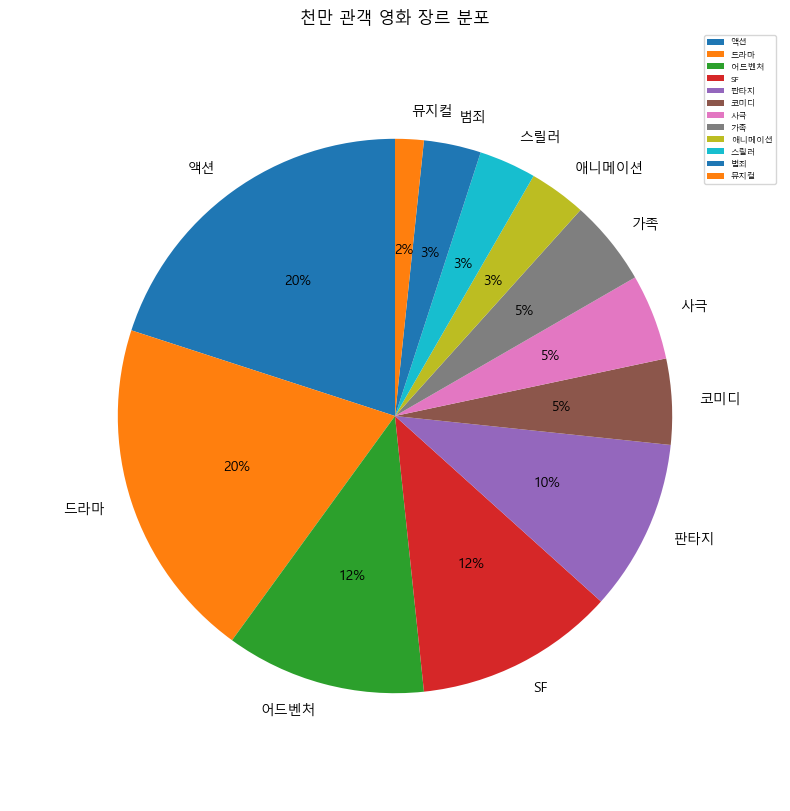

In [98]:
labels = genre_freq.columns.tolist()
ratio = genre_freq.values.flatten().tolist()

# 비율순으로 정렬
sorted_ratio, sorted_labels = zip(*sorted(zip(ratio, labels), reverse=True))

plt.figure(figsize=(10, 10))

plt.pie(sorted_ratio, labels=sorted_labels, autopct='%.0f%%', startangle=90, radius=0.9)
plt.title('천만 관객 영화 장르 분포')
plt.legend(sorted_labels, loc='best', fontsize=6)

plt.show()

In [100]:
mv_1000_data[mv_1000_data['영화명'] == '왕의 남자']

,영화명,배급사,개봉일,매출액,관객수,제작연도,장르
139,왕의 남자,(주)시네마서비스,2005-12-29,66019904400,10514177,사극,사극


# 천만 관객 개봉 월

In [101]:
mv_ymd = pd.to_datetime(mv_1000_data['개봉일'])
mv_ymd

64    2014-07-30
28    2019-01-23
105   2017-12-20
24    2014-12-17
129   2019-04-24
13    2019-11-21
85    2015-08-05
113   2009-12-17
51    2012-07-25
3     2013-01-23
121   2019-05-23
122   2015-07-22
81    2022-05-18
20    2012-09-13
104   2018-08-01
180   2017-08-02
90    2016-07-20
86    2013-12-18
194   2009-07-22
130   2018-04-25
21    2006-07-27
114   2022-12-14
139   2005-12-29
128   2015-04-23
150   2014-11-06
29    2019-05-30
12    2014-01-16
Name: 개봉일, dtype: datetime64[ns]

In [103]:
mv_1000_data['개봉연도'] = mv_ymd.dt.year
mv_1000_data['개봉월'] = mv_ymd.dt.month
mv_1000_data['개봉일'] = mv_ymd.dt.day

day_of_week = mv_ymd.dt.dayofweek
day_map = {0: '월', 1: '화', 2: '수', 3: '목', 4: '금', 5: '토', 6: '일'}
mv_1000_data['개봉요일'] = day_of_week.map(day_map)

mv_1000_data = mv_1000_data[['영화명', '배급사', '개봉연도','개봉월', '개봉일', '개봉요일',
            '매출액', '관객수', '장르', '제작연도']]
mv_1000_data

,영화명,배급사,개봉연도,개봉월,개봉일,개봉요일,매출액,관객수,장르,제작연도
64,명량,(주)씨제이이엔엠,2014,7,30,수,135758658810,17615919,"사극,액션",2013.0
28,극한직업,(주)씨제이이엔엠,2019,1,23,수,139655543516,16266338,코미디,2018.0
105,신과함께-죄와 벌,롯데쇼핑㈜롯데엔터테인먼트,2017,12,20,수,115727528087,14414658,"판타지,드라마",2017.0
24,국제시장,(주)씨제이이엔엠,2014,12,17,수,110947621230,14264478,드라마,2014.0
129,어벤져스: 엔드게임,월트디즈니컴퍼니코리아 유한책임회사,2019,4,24,수,122492181020,13977602,"액션,SF",2018.0
13,겨울왕국 2,월트디즈니컴퍼니코리아 유한책임회사,2019,11,21,목,114843932550,13750668,애니메이션,2019.0
85,베테랑,(주)씨제이이엔엠,2015,8,5,수,105170856250,13414484,"액션,드라마",2014.0
113,아바타,"주식회사 해리슨앤컴퍼니,이십세기폭스코리아(주)",2009,12,17,목,125304346000,13338863,"SF,액션,어드벤처",2009.0
51,도둑들,(주)쇼박스,2012,7,25,수,93672497700,12984701,"액션,범죄",2012.0
3,7번방의 선물,(주)넥스트엔터테인먼트월드(NEW),2013,1,23,수,91437368170,12812144,"코미디,드라마",2012.0


In [104]:
mv_1000_data.drop('제작연도', axis=1, inplace=True)

In [105]:
mv_1000_data

,영화명,배급사,개봉연도,개봉월,개봉일,개봉요일,매출액,관객수,장르
64,명량,(주)씨제이이엔엠,2014,7,30,수,135758658810,17615919,"사극,액션"
28,극한직업,(주)씨제이이엔엠,2019,1,23,수,139655543516,16266338,코미디
105,신과함께-죄와 벌,롯데쇼핑㈜롯데엔터테인먼트,2017,12,20,수,115727528087,14414658,"판타지,드라마"
24,국제시장,(주)씨제이이엔엠,2014,12,17,수,110947621230,14264478,드라마
129,어벤져스: 엔드게임,월트디즈니컴퍼니코리아 유한책임회사,2019,4,24,수,122492181020,13977602,"액션,SF"
13,겨울왕국 2,월트디즈니컴퍼니코리아 유한책임회사,2019,11,21,목,114843932550,13750668,애니메이션
85,베테랑,(주)씨제이이엔엠,2015,8,5,수,105170856250,13414484,"액션,드라마"
113,아바타,"주식회사 해리슨앤컴퍼니,이십세기폭스코리아(주)",2009,12,17,목,125304346000,13338863,"SF,액션,어드벤처"
51,도둑들,(주)쇼박스,2012,7,25,수,93672497700,12984701,"액션,범죄"
3,7번방의 선물,(주)넥스트엔터테인먼트월드(NEW),2013,1,23,수,91437368170,12812144,"코미디,드라마"


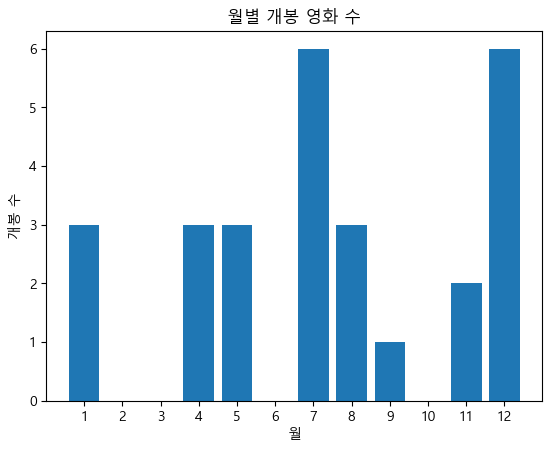

In [130]:
# 개봉월별 개봉영화 수 계산
monthly_counts = mv_1000_data['개봉월'].value_counts().sort_index()

# 그래프 그리기
plt.bar(monthly_counts.index, monthly_counts.values)
plt.xlabel('월')
plt.ylabel('개봉 수')
plt.title('월별 개봉 영화 수')
plt.xticks(range(1, 13))
plt.show()

# 천만 관객 개봉 요일

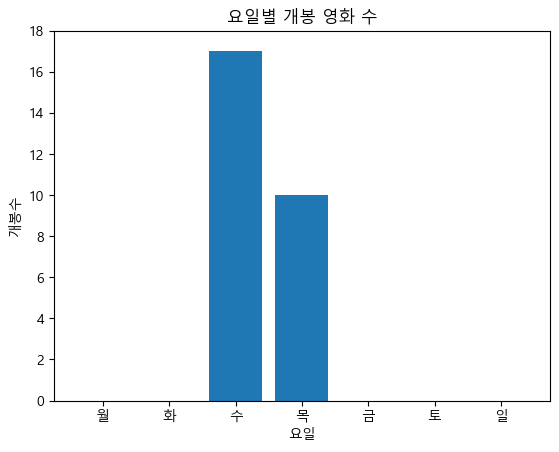

In [131]:
# 요일별 개봉수 계산
weekday_counts = mv_1000_data['개봉요일'].value_counts().reindex(['월', '화', '수', '목', '금', '토', '일'], fill_value=0)

# 그래프 그리기
plt.bar(weekday_counts.index, weekday_counts.values)
plt.xlabel('요일')
plt.ylabel('개봉수')
plt.title('요일별 개봉 영화 수')
plt.ylim(0, 18)

plt.show()

# 같은 개봉일을 같는 영화 추출

In [148]:
# 같은 개봉 월 추출
same_md = mv_1000_data[mv_1000_data.duplicated(['개봉월'], keep=False)]
same_md.sort_values('개봉월', inplace=True)
same_md

,영화명,배급사,개봉연도,개봉월,개봉일,개봉요일,매출액,관객수,장르
12,겨울왕국,소니픽쳐스릴리징월트디즈니스튜디오스코리아(주),2014,1,16,목,82544207680,10305051,"애니메이션,어드벤처,가족,코미디,뮤지컬,판타지"
28,극한직업,(주)씨제이이엔엠,2019,1,23,수,139655543516,16266338,코미디
3,7번방의 선물,(주)넥스트엔터테인먼트월드(NEW),2013,1,23,수,91437368170,12812144,"코미디,드라마"
128,어벤져스: 에이지 오브 울트론,"월트디즈니컴퍼니코리아 유한책임회사,월트디즈니컴퍼니코리아(주)",2015,4,23,목,88645598646,10504487,"액션,어드벤처,판타지,SF"
130,어벤져스: 인피니티 워,월트디즈니컴퍼니코리아 유한책임회사,2018,4,25,수,100081428549,11233176,"액션,어드벤처,판타지,SF"
129,어벤져스: 엔드게임,월트디즈니컴퍼니코리아 유한책임회사,2019,4,24,수,122492181020,13977602,"액션,SF"
29,기생충,(주)씨제이이엔엠,2019,5,30,목,87463965795,10313519,드라마
121,알라딘,월트디즈니컴퍼니코리아 유한책임회사,2019,5,23,목,109041960039,12797927,"어드벤처,가족,판타지"
81,범죄도시2,"주식회사 에이비오엔터테인먼트,플러스엠 엔터테인먼트",2022,5,18,수,131298796478,12693415,"범죄,액션"
194,해운대,CJ ENM,2009,7,22,수,81028720000,11325117,"액션,드라마,어드벤처"


In [151]:
# 같은 개봉 일 추출
same_md = mv_1000_data[mv_1000_data.duplicated(['개봉일'], keep=False)]
same_md.sort_values('개봉월')

,영화명,배급사,개봉연도,개봉월,개봉일,개봉요일,매출액,관객수,장르
28,극한직업,(주)씨제이이엔엠,2019,1,23,수,139655543516,16266338,코미디
3,7번방의 선물,(주)넥스트엔터테인먼트월드(NEW),2013,1,23,수,91437368170,12812144,"코미디,드라마"
130,어벤져스: 인피니티 워,월트디즈니컴퍼니코리아 유한책임회사,2018,4,25,수,100081428549,11233176,"액션,어드벤처,판타지,SF"
128,어벤져스: 에이지 오브 울트론,"월트디즈니컴퍼니코리아 유한책임회사,월트디즈니컴퍼니코리아(주)",2015,4,23,목,88645598646,10504487,"액션,어드벤처,판타지,SF"
121,알라딘,월트디즈니컴퍼니코리아 유한책임회사,2019,5,23,목,109041960039,12797927,"어드벤처,가족,판타지"
81,범죄도시2,"주식회사 에이비오엔터테인먼트,플러스엠 엔터테인먼트",2022,5,18,수,131298796478,12693415,"범죄,액션"
29,기생충,(주)씨제이이엔엠,2019,5,30,목,87463965795,10313519,드라마
64,명량,(주)씨제이이엔엠,2014,7,30,수,135758658810,17615919,"사극,액션"
51,도둑들,(주)쇼박스,2012,7,25,수,93672497700,12984701,"액션,범죄"
122,암살,(주)쇼박스,2015,7,22,수,98469385781,12706947,"액션,드라마"


In [153]:
# 같은 개봉 월일 추출
same_md = mv_1000_data[mv_1000_data.duplicated(['개봉월', '개봉일'], keep=False)]
same_md.sort_values('개봉월')

,영화명,배급사,개봉연도,개봉월,개봉일,개봉요일,매출액,관객수,장르
28,극한직업,(주)씨제이이엔엠,2019,1,23,수,139655543516,16266338,코미디
3,7번방의 선물,(주)넥스트엔터테인먼트월드(NEW),2013,1,23,수,91437368170,12812144,"코미디,드라마"
122,암살,(주)쇼박스,2015,7,22,수,98469385781,12706947,"액션,드라마"
194,해운대,CJ ENM,2009,7,22,수,81028720000,11325117,"액션,드라마,어드벤처"
24,국제시장,(주)씨제이이엔엠,2014,12,17,수,110947621230,14264478,드라마
113,아바타,"주식회사 해리슨앤컴퍼니,이십세기폭스코리아(주)",2009,12,17,목,125304346000,13338863,"SF,액션,어드벤처"


In [180]:
# 7번방-극한직업 (6년) / 해운대-암살 (6년) / 아바타-국제시장(5년)
# 어벤져스 (4월 23,24,25)

In [167]:
same_md_mv = same_md[['영화명', '개봉연도', '개봉월', '개봉일', '개봉요일']]
same_md_mv = same_md_mv.sort_values(['개봉월', '개봉연도'])
same_md_mv

,영화명,개봉연도,개봉월,개봉일,개봉요일
3,7번방의 선물,2013,1,23,수
28,극한직업,2019,1,23,수
194,해운대,2009,7,22,수
122,암살,2015,7,22,수
113,아바타,2009,12,17,목
24,국제시장,2014,12,17,수


# 천만 관객 영화 상영수

In [300]:
date_mv = pd.read_csv('./use_data_2/MovieStat_Top200_수정.csv')
date_mv

,TOP200,movie name,날짜,스크린수,스크린점유율,상영횟수,상영점유율,좌석수,좌석점유율,좌석판매율,매출액,매출액증감(전일대비),관객수,관객수증감(전일대비),누적매출액,누적관객수,순위
0,1,명량,2014-07-20,1,0.000,1,0.000,238,0.000,1.000,1428000,1428000 ( 100.0% ),238,238 ( 100.0% ),1428000,238,34
1,1,명량,2014-07-21,18,0.005,28,0.002,7241,0.003,0.741,44016000,42588000 ( 2982.4% ),5369,5131 ( 2155.9% ),45444000,5607,7
2,1,명량,2014-07-22,37,0.010,38,0.003,5600,0.003,0.099,4416000,-39600000 ( -90.0% ),552,-4817 ( -89.7% ),49860000,6159,22
3,1,명량,2014-07-23,4,0.001,4,0.000,837,0.000,1.000,6696000,2280000 ( 51.6% ),837,285 ( 51.6% ),56556000,6996,9
4,1,명량,2014-07-24,8,0.002,10,0.001,1741,0.001,1.086,14979000,8283000 ( 123.7% ),1890,1053 ( 125.8% ),71535000,8886,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24159,200,부러진 화살,2016-04-05,1,0.000,1,0.000,94,0.000,0.021,13000,7000 ( 116.7% ),2,1 ( 100.0% ),25937362000,3459879,98
24160,200,부러진 화살,2016-07-13,1,0.000,3,0.000,849,0.000,0.219,352000,352000 ( 100.0% ),186,186 ( 100.0% ),25937714000,3460065,39
24161,200,부러진 화살,2016-07-14,1,0.000,3,0.000,849,0.000,0.141,226000,-126000 ( -35.8% ),120,-66 ( -35.5% ),25937940000,3460185,44
24162,200,부러진 화살,2016-10-03,1,0.000,1,0.000,94,0.000,0.149,82000,82000 ( 100.0% ),14,14 ( 100.0% ),25938022000,3460199,75


# 1000만 관객 영화명 리스트화

In [14]:
list_1000_name = mv_1000_data['영화명'].tolist()
list_1000_name

['명량',
 '극한직업',
 '신과함께-죄와 벌',
 '국제시장',
 '어벤져스: 엔드게임',
 '겨울왕국 2',
 '베테랑',
 '아바타',
 '도둑들',
 '7번방의 선물',
 '알라딘',
 '암살',
 '범죄도시2',
 '광해, 왕이 된 남자',
 '신과함께-인과 연',
 '택시운전사',
 '부산행',
 '변호인',
 '해운대',
 '어벤져스: 인피니티 워',
 '괴물',
 '아바타: 물의 길',
 '왕의 남자',
 '어벤져스: 에이지 오브 울트론',
 '인터스텔라',
 '기생충',
 '겨울왕국']

# 1000만 관객 영화 정보만 필터링

In [302]:
list_1000 = pd.DataFrame()
list_1000

""


In [304]:
print(len(date_mv[date_mv['movie name'] == list_1000_name[0]]))
new_row = date_mv[date_mv['movie name'] == list_1000_name[0]]
new_row

171


,TOP200,movie name,날짜,스크린수,스크린점유율,상영횟수,상영점유율,좌석수,좌석점유율,좌석판매율,매출액,매출액증감(전일대비),관객수,관객수증감(전일대비),누적매출액,누적관객수,순위
0,1,명량,2014-07-20,1,0.000,1,0.000,238,0.000,1.000,1428000,1428000 ( 100.0% ),238,238 ( 100.0% ),1428000,238,34
1,1,명량,2014-07-21,18,0.005,28,0.002,7241,0.003,0.741,44016000,42588000 ( 2982.4% ),5369,5131 ( 2155.9% ),45444000,5607,7
2,1,명량,2014-07-22,37,0.010,38,0.003,5600,0.003,0.099,4416000,-39600000 ( -90.0% ),552,-4817 ( -89.7% ),49860000,6159,22
3,1,명량,2014-07-23,4,0.001,4,0.000,837,0.000,1.000,6696000,2280000 ( 51.6% ),837,285 ( 51.6% ),56556000,6996,9
4,1,명량,2014-07-24,8,0.002,10,0.001,1741,0.001,1.086,14979000,8283000 ( 123.7% ),1890,1053 ( 125.8% ),71535000,8886,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,1,명량,2022-07-04,1,0.000,1,0.000,35,0.000,1.000,175000,175000 ( 100.0% ),35,35 ( 100.0% ),135757593810,17615721,48
167,1,명량,2022-07-05,1,0.000,1,0.000,62,0.000,0.726,225000,50000 ( 28.6% ),45,10 ( 28.6% ),135757818810,17615766,49
168,1,명량,2022-07-06,1,0.000,1,0.000,62,0.000,0.565,175000,-50000 ( -22.2% ),35,-10 ( -22.2% ),135757993810,17615801,48
169,1,명량,2022-07-07,1,0.000,1,0.000,62,0.000,0.694,215000,40000 ( 22.9% ),43,8 ( 22.9% ),135758208810,17615844,53


In [305]:
new_row['누적상영횟수'] = new_row['상영횟수'].cumsum()
new_row

,TOP200,movie name,날짜,스크린수,스크린점유율,상영횟수,상영점유율,좌석수,좌석점유율,좌석판매율,매출액,매출액증감(전일대비),관객수,관객수증감(전일대비),누적매출액,누적관객수,순위,누적상영횟수
0,1,명량,2014-07-20,1,0.000,1,0.000,238,0.000,1.000,1428000,1428000 ( 100.0% ),238,238 ( 100.0% ),1428000,238,34,1
1,1,명량,2014-07-21,18,0.005,28,0.002,7241,0.003,0.741,44016000,42588000 ( 2982.4% ),5369,5131 ( 2155.9% ),45444000,5607,7,29
2,1,명량,2014-07-22,37,0.010,38,0.003,5600,0.003,0.099,4416000,-39600000 ( -90.0% ),552,-4817 ( -89.7% ),49860000,6159,22,67
3,1,명량,2014-07-23,4,0.001,4,0.000,837,0.000,1.000,6696000,2280000 ( 51.6% ),837,285 ( 51.6% ),56556000,6996,9,71
4,1,명량,2014-07-24,8,0.002,10,0.001,1741,0.001,1.086,14979000,8283000 ( 123.7% ),1890,1053 ( 125.8% ),71535000,8886,9,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,1,명량,2022-07-04,1,0.000,1,0.000,35,0.000,1.000,175000,175000 ( 100.0% ),35,35 ( 100.0% ),135757593810,17615721,48,188721
167,1,명량,2022-07-05,1,0.000,1,0.000,62,0.000,0.726,225000,50000 ( 28.6% ),45,10 ( 28.6% ),135757818810,17615766,49,188722
168,1,명량,2022-07-06,1,0.000,1,0.000,62,0.000,0.565,175000,-50000 ( -22.2% ),35,-10 ( -22.2% ),135757993810,17615801,48,188723
169,1,명량,2022-07-07,1,0.000,1,0.000,62,0.000,0.694,215000,40000 ( 22.9% ),43,8 ( 22.9% ),135758208810,17615844,53,188724


In [306]:
for i in range(len(list_1000_name)):
#     print(len(date_mv[date_mv['movie name'] == list_1000_name[i]]))
    new_row = date_mv[date_mv['movie name'] == list_1000_name[i]]
    new_row['누적상영횟수'] = new_row['상영횟수'].cumsum()
    list_1000 = pd.concat([list_1000, new_row])
list_1000

,TOP200,movie name,날짜,스크린수,스크린점유율,상영횟수,상영점유율,좌석수,좌석점유율,좌석판매율,매출액,매출액증감(전일대비),관객수,관객수증감(전일대비),누적매출액,누적관객수,순위,누적상영횟수
0,1,명량,2014-07-20,1,0.000,1,0.000,238,0.000,1.000,1428000,1428000 ( 100.0% ),238,238 ( 100.0% ),1428000,238,34,1
1,1,명량,2014-07-21,18,0.005,28,0.002,7241,0.003,0.741,44016000,42588000 ( 2982.4% ),5369,5131 ( 2155.9% ),45444000,5607,7,29
2,1,명량,2014-07-22,37,0.010,38,0.003,5600,0.003,0.099,4416000,-39600000 ( -90.0% ),552,-4817 ( -89.7% ),49860000,6159,22,67
3,1,명량,2014-07-23,4,0.001,4,0.000,837,0.000,1.000,6696000,2280000 ( 51.6% ),837,285 ( 51.6% ),56556000,6996,9,71
4,1,명량,2014-07-24,8,0.002,10,0.001,1741,0.001,1.086,14979000,8283000 ( 123.7% ),1890,1053 ( 125.8% ),71535000,8886,9,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4427,27,겨울왕국,2023-02-05,10,0.001,11,0.001,1556,0.001,0.100,1760600,-2222000 ( -55.8% ),156,-155 ( -49.8% ),82540847680,10304752,29,157915
4428,27,겨울왕국,2023-02-06,8,0.001,8,0.001,1031,0.001,0.048,567300,-1193300 ( -67.8% ),50,-106 ( -67.9% ),82541414980,10304802,40,157923
4429,27,겨울왕국,2023-02-07,10,0.001,10,0.001,1323,0.001,0.082,1207100,639800 ( 112.8% ),108,58 ( 116.0% ),82542622080,10304910,33,157933
4430,27,겨울왕국,2023-02-11,9,0.001,9,0.001,1265,0.001,0.045,631800,631800 ( 100.0% ),57,57 ( 100.0% ),82543253880,10304967,54,157942


In [307]:
# 올바른 데이터인지 확인
list_1000['movie name'].duplicated().value_counts()

True     4405
False      27
Name: movie name, dtype: int64

# 데이터 저장
### (1000만 관객_MovieStat_Top200_수정)

In [308]:
list_1000.to_csv('./MovieStat_Top200_수정(천만관객).csv', index=False)

# 사용하지 않을 컬럼 제거

In [378]:
list_1000 = pd.read_csv('./MovieStat_Top200_수정(천만관객).csv')
list_1000

,TOP200,movie name,날짜,스크린수,스크린점유율,상영횟수,상영점유율,좌석수,좌석점유율,좌석판매율,매출액,매출액증감(전일대비),관객수,관객수증감(전일대비),누적매출액,누적관객수,순위,누적상영횟수
0,1,명량,2014-07-20,1,0.000,1,0.000,238,0.000,1.000,1428000,1428000 ( 100.0% ),238,238 ( 100.0% ),1428000,238,34,1
1,1,명량,2014-07-21,18,0.005,28,0.002,7241,0.003,0.741,44016000,42588000 ( 2982.4% ),5369,5131 ( 2155.9% ),45444000,5607,7,29
2,1,명량,2014-07-22,37,0.010,38,0.003,5600,0.003,0.099,4416000,-39600000 ( -90.0% ),552,-4817 ( -89.7% ),49860000,6159,22,67
3,1,명량,2014-07-23,4,0.001,4,0.000,837,0.000,1.000,6696000,2280000 ( 51.6% ),837,285 ( 51.6% ),56556000,6996,9,71
4,1,명량,2014-07-24,8,0.002,10,0.001,1741,0.001,1.086,14979000,8283000 ( 123.7% ),1890,1053 ( 125.8% ),71535000,8886,9,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4427,27,겨울왕국,2023-02-05,10,0.001,11,0.001,1556,0.001,0.100,1760600,-2222000 ( -55.8% ),156,-155 ( -49.8% ),82540847680,10304752,29,157915
4428,27,겨울왕국,2023-02-06,8,0.001,8,0.001,1031,0.001,0.048,567300,-1193300 ( -67.8% ),50,-106 ( -67.9% ),82541414980,10304802,40,157923
4429,27,겨울왕국,2023-02-07,10,0.001,10,0.001,1323,0.001,0.082,1207100,639800 ( 112.8% ),108,58 ( 116.0% ),82542622080,10304910,33,157933
4430,27,겨울왕국,2023-02-11,9,0.001,9,0.001,1265,0.001,0.045,631800,631800 ( 100.0% ),57,57 ( 100.0% ),82543253880,10304967,54,157942


In [379]:
# 컬럼 제거
list_1000.drop(['TOP200', '스크린수', '상영횟수', '상영점유율',
                '좌석수', '좌석점유율', '좌석판매율', '매출액증감(전일대비)',
                '관객수증감(전일대비)', '순위'],
               axis=1, inplace=True)

In [380]:
# 컬럼 순서 변경
list_1000 = list_1000[['movie name', '날짜', '스크린점유율', '관객수', '누적관객수', '매출액', '누적매출액', '누적상영횟수']]
list_1000

,movie name,날짜,스크린점유율,관객수,누적관객수,매출액,누적매출액,누적상영횟수
0,명량,2014-07-20,0.000,238,238,1428000,1428000,1
1,명량,2014-07-21,0.005,5369,5607,44016000,45444000,29
2,명량,2014-07-22,0.010,552,6159,4416000,49860000,67
3,명량,2014-07-23,0.001,837,6996,6696000,56556000,71
4,명량,2014-07-24,0.002,1890,8886,14979000,71535000,81
...,...,...,...,...,...,...,...,...
4427,겨울왕국,2023-02-05,0.001,156,10304752,1760600,82540847680,157915
4428,겨울왕국,2023-02-06,0.001,50,10304802,567300,82541414980,157923
4429,겨울왕국,2023-02-07,0.001,108,10304910,1207100,82542622080,157933
4430,겨울왕국,2023-02-11,0.001,57,10304967,631800,82543253880,157942


In [381]:
# 점유율 *100 처리
list_1000['스크린점유율'] = (list_1000['스크린점유율']*100)
list_1000.head(10)

,movie name,날짜,스크린점유율,관객수,누적관객수,매출액,누적매출액,누적상영횟수
0,명량,2014-07-20,0.0,238,238,1428000,1428000,1
1,명량,2014-07-21,0.5,5369,5607,44016000,45444000,29
2,명량,2014-07-22,1.0,552,6159,4416000,49860000,67
3,명량,2014-07-23,0.1,837,6996,6696000,56556000,71
4,명량,2014-07-24,0.2,1890,8886,14979000,71535000,81
5,명량,2014-07-25,0.2,1164,10050,10268000,81803000,87
6,명량,2014-07-27,0.5,2428,12478,16996000,98799000,105
7,명량,2014-07-28,0.3,1949,14427,13799000,112598000,117
8,명량,2014-07-29,1.0,8073,22500,59633000,172231000,157
9,명량,2014-07-30,33.6,682701,705201,4708879000,4881110000,6304


# 날짜 데이터 date type으로 변환

In [382]:
list_1000['날짜'] = pd.to_datetime(list_1000['날짜'], format = '%Y-%m-%d')
list_1000

,movie name,날짜,스크린점유율,관객수,누적관객수,매출액,누적매출액,누적상영횟수
0,명량,2014-07-20,0.0,238,238,1428000,1428000,1
1,명량,2014-07-21,0.5,5369,5607,44016000,45444000,29
2,명량,2014-07-22,1.0,552,6159,4416000,49860000,67
3,명량,2014-07-23,0.1,837,6996,6696000,56556000,71
4,명량,2014-07-24,0.2,1890,8886,14979000,71535000,81
...,...,...,...,...,...,...,...,...
4427,겨울왕국,2023-02-05,0.1,156,10304752,1760600,82540847680,157915
4428,겨울왕국,2023-02-06,0.1,50,10304802,567300,82541414980,157923
4429,겨울왕국,2023-02-07,0.1,108,10304910,1207100,82542622080,157933
4430,겨울왕국,2023-02-11,0.1,57,10304967,631800,82543253880,157942


In [383]:
# 개봉 1일차
list_1000[list_1000['movie name'] == '명량'].head(1)

,movie name,날짜,스크린점유율,관객수,누적관객수,매출액,누적매출액,누적상영횟수
0,명량,2014-07-20,0.0,238,238,1428000,1428000,1


In [384]:
test_first = list_1000[list_1000['movie name'] == list_1000_name[0]].head(1)
test_first

,movie name,날짜,스크린점유율,관객수,누적관객수,매출액,누적매출액,누적상영횟수
0,명량,2014-07-20,0.0,238,238,1428000,1428000,1


In [385]:
# 개봉 마지막일
list_1000[list_1000['movie name'] == '명량'].tail(1)

,movie name,날짜,스크린점유율,관객수,누적관객수,매출액,누적매출액,누적상영횟수
170,명량,2022-12-20,0.0,75,17615919,450000,135758658810,188726


In [386]:
# 천만 관객 돌파 일
test1000 = list_1000[list_1000['movie name'] == '명량']
test1000 = test1000[test1000['누적관객수'] >= 10000000].head(1)
test1000

,movie name,날짜,스크린점유율,관객수,누적관객수,매출액,누적매출액,누적상영횟수
20,명량,2014-08-10,31.5,1032388,10806055,8225301600,83511475091,85469


In [387]:
test_first['날짜']

0   2014-07-20
Name: 날짜, dtype: datetime64[ns]

In [388]:
test1000['날짜']

20   2014-08-10
Name: 날짜, dtype: datetime64[ns]

In [389]:
# 차이 일수 계산
day_diff = (test1000.iloc[0]['날짜'] - test_first.iloc[0]['날짜']).days
day_diff

21

# 일수 계산 합치기

In [390]:
day_data = []
for i in range(len(list_1000_name)):
    # 개봉 1일차
    day_1 = list_1000[list_1000['movie name'] == list_1000_name[i]].head(1)
    # 천만 관객 돌파 일
    day_1000 = list_1000[list_1000['movie name'] == list_1000_name[i]]
    day_1000 = day_1000[day_1000['누적관객수'] >= 10000000].head(1)
    # 차이 일수 계산
    day_diff = (day_1000.iloc[0]['날짜'] - day_1.iloc[0]['날짜']).days
    # 상영수
    cnt = day_1000.iloc[0]['누적상영횟수']
    
    # 데이터프레임에 넣을 리스트 내용 추가
    day_data.append({'영화명':list_1000_name[i], '일수':day_diff,
                    '상영수':cnt})
day_1000_data = pd.DataFrame(day_data)
day_1000_data

,영화명,일수,상영수
0,명량,21,85469
1,극한직업,28,144068
2,신과함께-죄와 벌,24,117526
3,국제시장,51,122148
4,어벤져스: 엔드게임,11,132566
5,겨울왕국 2,17,191681
6,베테랑,42,122300
7,아바타,43,110147
8,도둑들,40,99110
9,7번방의 선물,41,108568


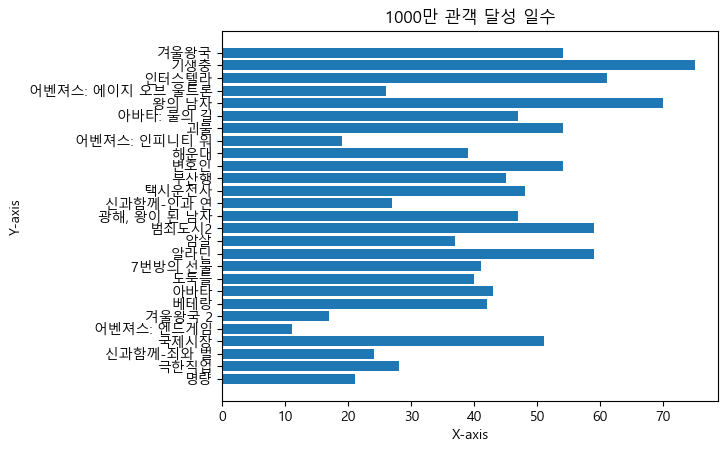

In [391]:
# 막대 그래프 그리기
x = day_1000_data['영화명']
y = day_1000_data['일수']

plt.barh(x, y)

# 그래프 제목과 축 이름 설정
plt.title('1000만 관객 달성 일수')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# 그래프 출력
plt.show()

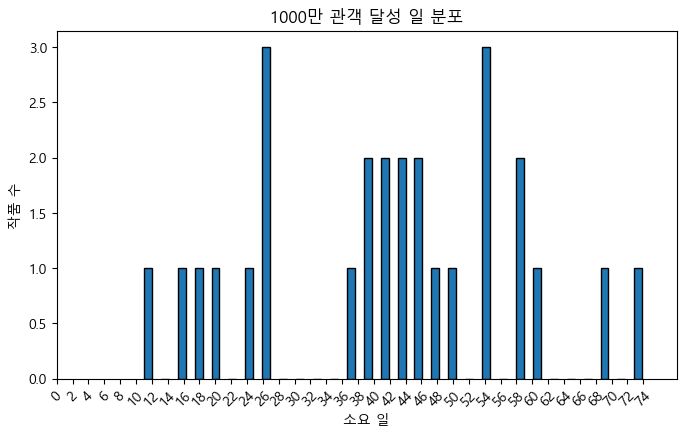

In [392]:
plt.figure(figsize=(8, 6))

# 히스토그램 그리기
plt.hist(day_1000_data['일수'], bins=30, edgecolor='black', width = 1)  # 일수 데이터와 구간(bin) 개수 설정

# 그래프 제목과 축 이름 설정
plt.title('1000만 관객 달성 일 분포')
plt.xlabel('소요 일')
plt.ylabel('작품 수')

# x축 눈금 설정
plt.xticks(range(0, max(day_1000_data['일수'])+1, 2), rotation=45)

# x축 값 크기 조정 및 오른쪽 맞춤
plt.subplots_adjust(bottom=0.3, right=0.9)

# 그래프 출력
plt.show()

# 1000만 관객 달성 평균 일수

In [393]:
day_1000_avg = int(day_1000_data['일수'].mean())
day_1000_short = int(day_1000_data['일수'].min())
day_1000_long = int(day_1000_data['일수'].max())
print(f'평균 : {day_1000_avg}일 \n최단 : {day_1000_short}일 \n최장 : {day_1000_long}일')

평균 : 42일 
최단 : 11일 
최장 : 75일


# 1000만 관객 달성 평균 상영수

In [394]:
cnt_1000_avg = int(day_1000_data['상영수'].mean())
cnt_1000_short = int(day_1000_data['상영수'].min())
cnt_1000_long = int(day_1000_data['상영수'].max())
print(f'평균 : {cnt_1000_avg}회 \n최소 : {cnt_1000_short}회 \n최대 : {cnt_1000_long}회')

평균 : 142029회 
최소 : 85469회 
최대 : 257294회


# 역대 영화 중 상위 5개 시각화

In [452]:
list_1000_top5 = list_1000[list_1000['movie name'] == list_1000_name[1]]
list_1000_top5

,movie name,날짜,스크린점유율,관객수,누적관객수,매출액,누적매출액,누적상영횟수
171,극한직업,2019-01-09,0.0,406,406,2436000,2436000,1
172,극한직업,2019-01-10,0.1,3279,3685,29543000,31979000,15
173,극한직업,2019-01-15,0.2,2201,5886,19809000,51788000,26
174,극한직업,2019-01-16,0.3,5094,10980,45846000,97634000,49
175,극한직업,2019-01-17,0.5,7746,18726,67707000,165341000,89
...,...,...,...,...,...,...,...,...
314,극한직업,2020-03-30,0.6,51,16266099,281000,139654320516,292760
315,극한직업,2020-03-31,0.7,84,16266183,442000,139654762516,292792
316,극한직업,2020-04-01,0.6,57,16266240,290000,139655052516,292814
317,극한직업,2020-05-22,0.0,97,16266337,485000,139655537516,292815


In [453]:
list_1000_top5 = pd.DataFrame()  # DataFrame 초기화
for i in range(0,10):
    new_top5_row = list_1000[list_1000['movie name'] == list_1000_name[i]]
    list_1000_top5 = pd.concat([list_1000_top5, new_top5_row])
list_1000_top5

,movie name,날짜,스크린점유율,관객수,누적관객수,매출액,누적매출액,누적상영횟수
0,명량,2014-07-20,0.0,238,238,1428000,1428000,1
1,명량,2014-07-21,0.5,5369,5607,44016000,45444000,29
2,명량,2014-07-22,1.0,552,6159,4416000,49860000,67
3,명량,2014-07-23,0.1,837,6996,6696000,56556000,71
4,명량,2014-07-24,0.2,1890,8886,14979000,71535000,81
...,...,...,...,...,...,...,...,...
1593,7번방의 선물,2020-05-23,0.5,87,12811909,522000,91435964170,166925
1594,7번방의 선물,2020-05-24,0.6,130,12812039,791000,91436755170,166964
1595,7번방의 선물,2020-05-25,0.5,49,12812088,291000,91437046170,166985
1596,7번방의 선물,2020-05-26,0.5,46,12812134,270000,91437316170,167008


In [463]:
top1 = list_1000_top5[list_1000_top5['movie name'] == '명량']
top1

,movie name,날짜,스크린점유율,관객수,누적관객수,매출액,누적매출액,누적상영횟수
0,명량,2014-07-20,0.0,238,238,1428000,1428000,1
1,명량,2014-07-21,0.5,5369,5607,44016000,45444000,29
2,명량,2014-07-22,1.0,552,6159,4416000,49860000,67
3,명량,2014-07-23,0.1,837,6996,6696000,56556000,71
4,명량,2014-07-24,0.2,1890,8886,14979000,71535000,81
...,...,...,...,...,...,...,...,...
166,명량,2022-07-04,0.0,35,17615721,175000,135757593810,188721
167,명량,2022-07-05,0.0,45,17615766,225000,135757818810,188722
168,명량,2022-07-06,0.0,35,17615801,175000,135757993810,188723
169,명량,2022-07-07,0.0,43,17615844,215000,135758208810,188724


In [464]:
top2 = list_1000_top5[list_1000_top5['movie name'] == '극한직업']
top2

,movie name,날짜,스크린점유율,관객수,누적관객수,매출액,누적매출액,누적상영횟수
171,극한직업,2019-01-09,0.0,406,406,2436000,2436000,1
172,극한직업,2019-01-10,0.1,3279,3685,29543000,31979000,15
173,극한직업,2019-01-15,0.2,2201,5886,19809000,51788000,26
174,극한직업,2019-01-16,0.3,5094,10980,45846000,97634000,49
175,극한직업,2019-01-17,0.5,7746,18726,67707000,165341000,89
...,...,...,...,...,...,...,...,...
314,극한직업,2020-03-30,0.6,51,16266099,281000,139654320516,292760
315,극한직업,2020-03-31,0.7,84,16266183,442000,139654762516,292792
316,극한직업,2020-04-01,0.6,57,16266240,290000,139655052516,292814
317,극한직업,2020-05-22,0.0,97,16266337,485000,139655537516,292815


In [467]:
date_1000_1 = day_1000_data.iloc[0]['일수']
date_1000_1

21

In [461]:
name_1000 = day_1000_data.iloc[0]['영화명']
name_1000

'명량'

# 일일 스크린 점유율 변화

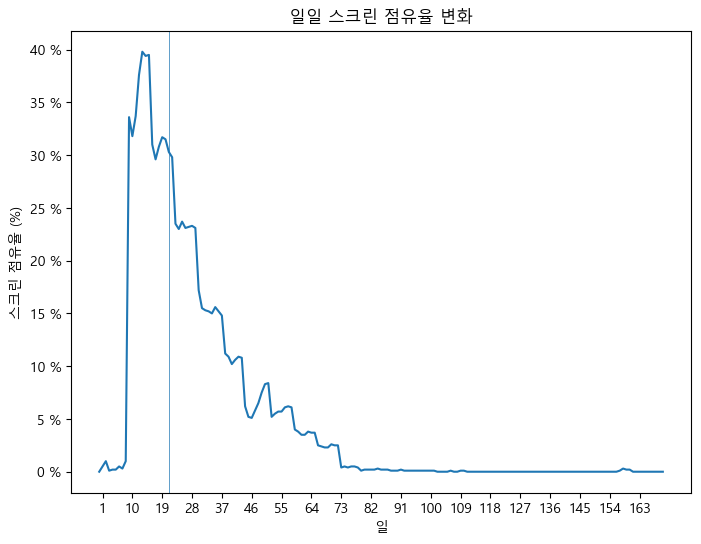

In [499]:
# 그림 크기 설정
plt.figure(figsize=(8, 6))  # 가로 8인치, 세로 6인치

# 꺾은선 그래프 그리기
plt.plot(range(len(top1)), top1['스크린점유율'])

# 기준선 그리기
plt.axvline(x=date_1000_1, linewidth=0.5)

# 그래프 제목과 축 이름 설정
plt.title('일일 스크린 점유율 변화')
plt.xlabel('일')
plt.ylabel('스크린 점유율 (%)')

# x축 눈금 설정
plt.xticks(range(1, len(top1) + 1, 9), range(1, len(top1) + 1, 9))

# y축의 단위를 억으로 설정
formatter = ticker.FuncFormatter(lambda x, pos: '{:.0f} %'.format(x / 1))
plt.gca().yaxis.set_major_formatter(formatter)

# 그래프 출력
plt.show()

# 일일 관객수 변화

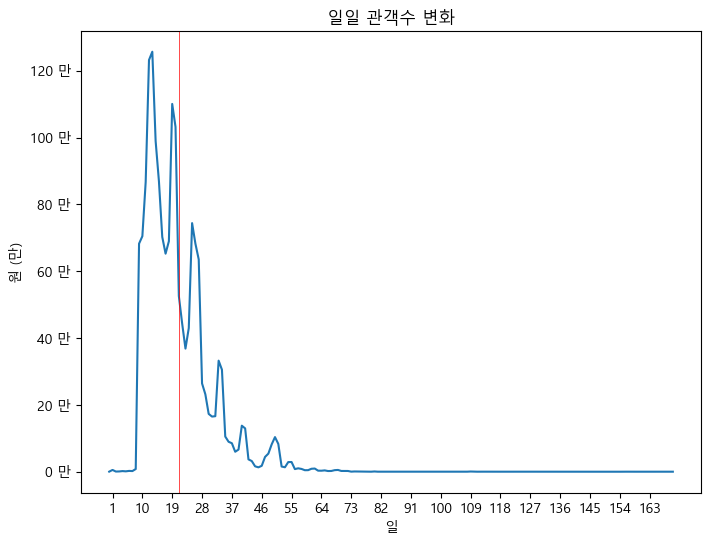

In [416]:
# 그림 크기 설정
plt.figure(figsize=(8, 6))  # 가로 8인치, 세로 6인치

# 꺾은선 그래프 그리기
plt.plot(range(len(top1)), top1['관객수'])

# 기준선 그리기
plt.axvline(x=date_1000, color='red', linewidth=0.5)

# 그래프 제목과 축 이름 설정
plt.title('일일 관객수 변화')
plt.xlabel('일')
plt.ylabel('원 (만)')

# x축 눈금 설정
plt.xticks(range(1, len(top1) + 1, 9), range(1, len(top1) + 1, 9))

# y축의 단위를 만으로 설정
formatter = ticker.FuncFormatter(lambda x, pos: '{:.0f} 만'.format(x / 10000))
plt.gca().yaxis.set_major_formatter(formatter)

# 그래프 출력
plt.show()

# 일일 매출 변화

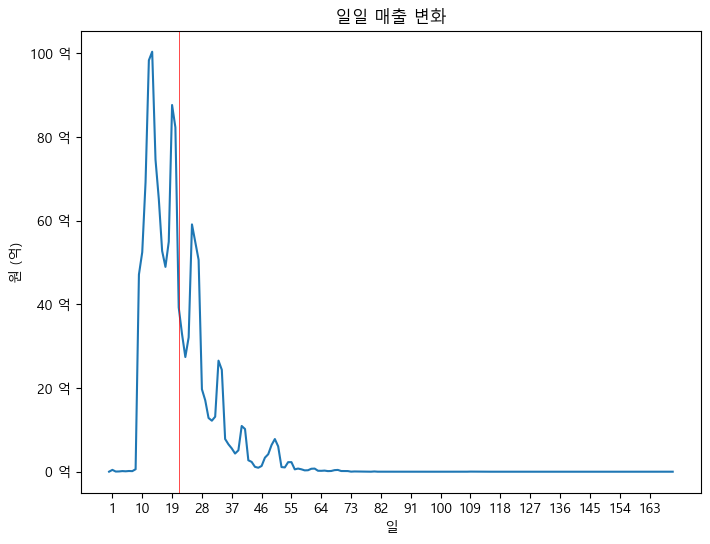

In [412]:
# 그림 크기 설정
plt.figure(figsize=(8, 6))  # 가로 8인치, 세로 6인치

# 꺾은선 그래프 그리기
plt.plot(range(len(top1)), top1['매출액'])

# 기준선 그리기
plt.axvline(x=date_1000, color='red', linewidth=0.5)

# 그래프 제목과 축 이름 설정
plt.title('일일 매출 변화')
plt.xlabel('일')
plt.ylabel('원 (억)')

# x축 눈금 설정
plt.xticks(range(1, len(top1) + 1, 9), range(1, len(top1) + 1, 9))

# y축의 단위를 만으로 설정
formatter = ticker.FuncFormatter(lambda x, pos: '{:.0f} 억'.format(x / 1e8))
plt.gca().yaxis.set_major_formatter(formatter)

# 그래프 출력
plt.show()

# 1000만 관객 영화 중 top5

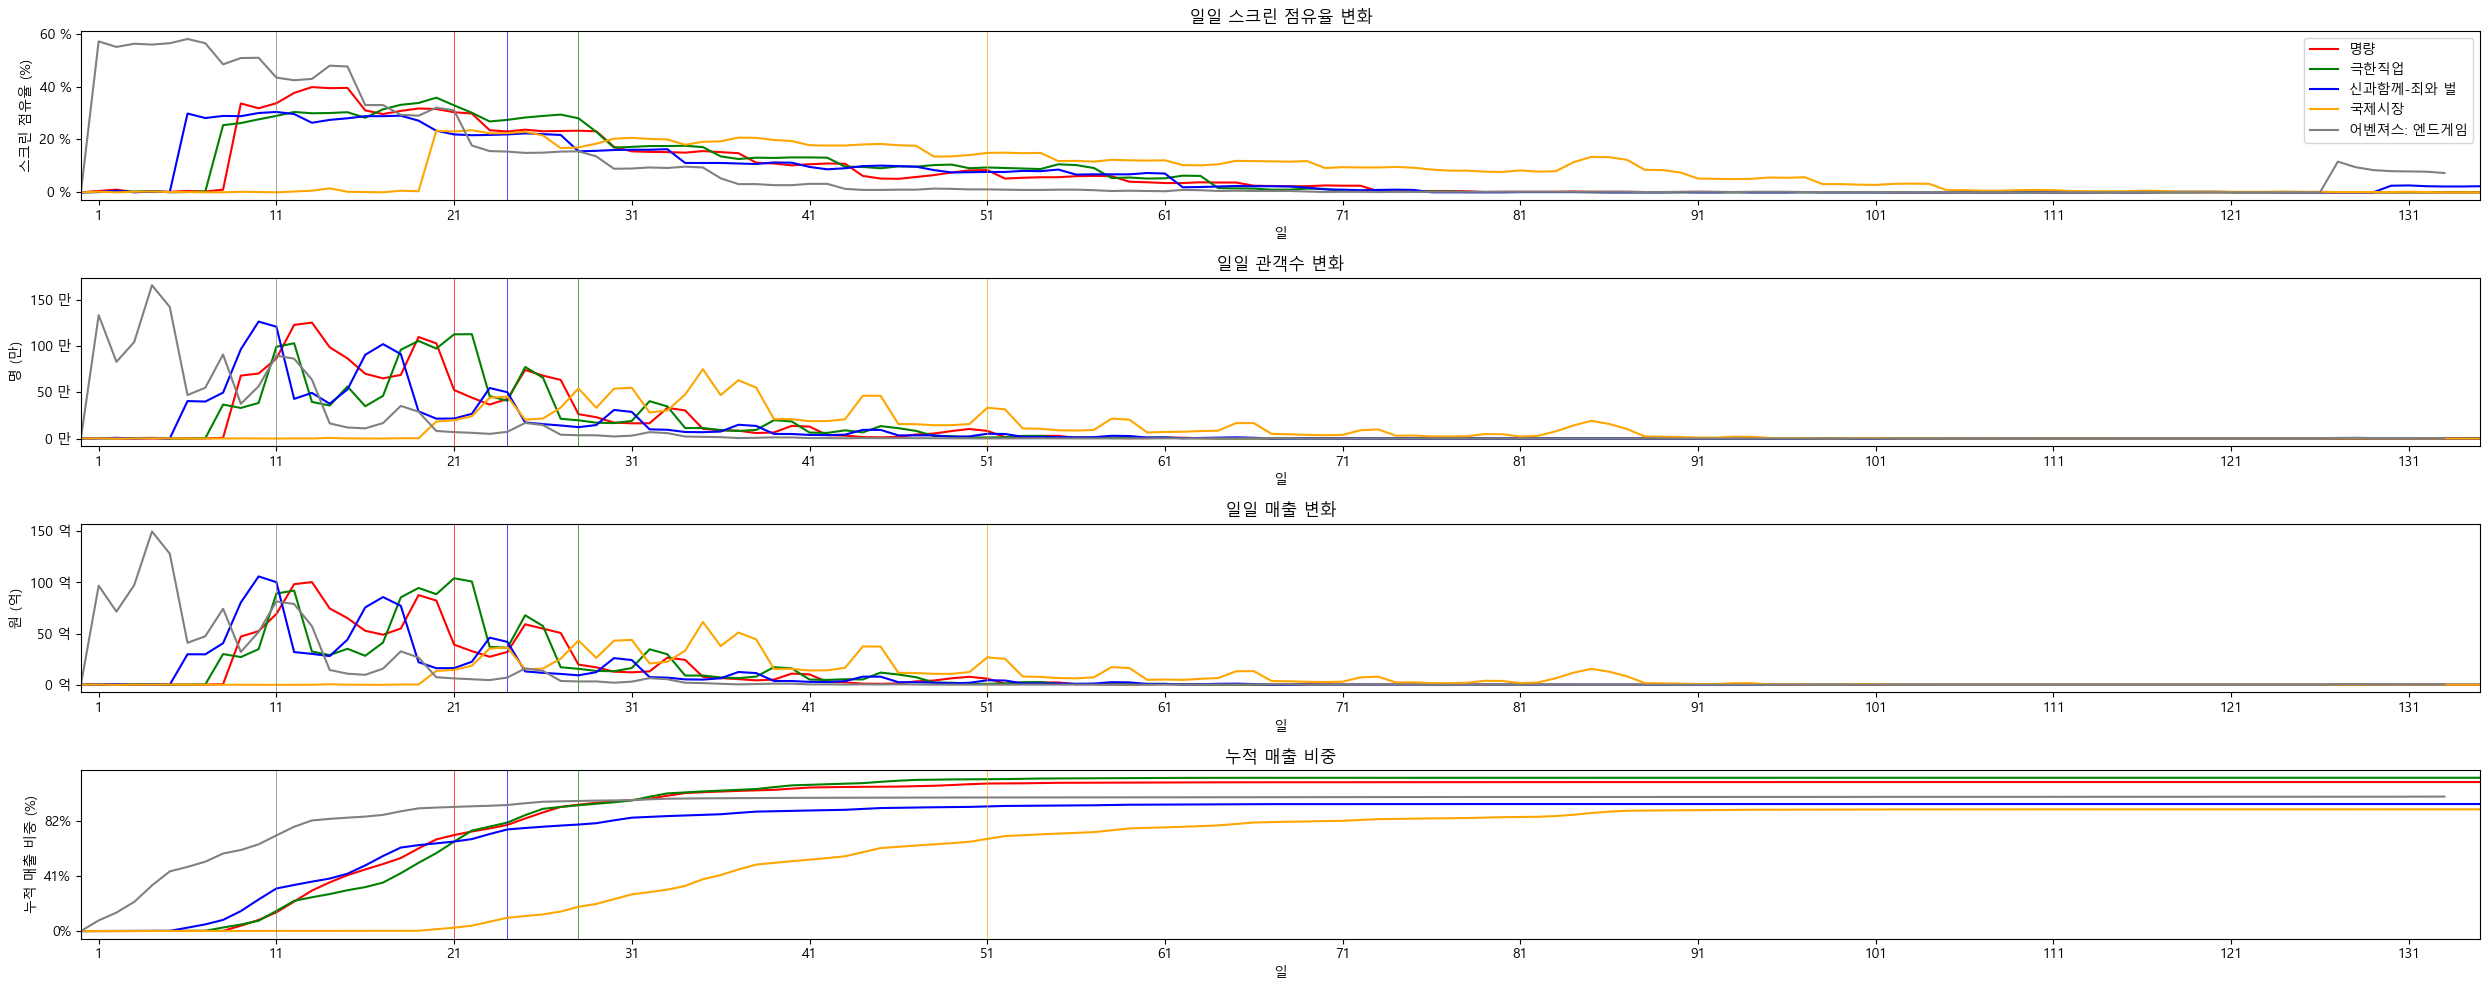

In [518]:
# 그림 크기 설정
plt.figure(figsize=(25, 10))  # 가로 12인치, 세로 8인치

color_list = ['red', 'green', 'blue', 'orange', 'grey']

# 서브플롯 1: 스크린 점유율 변화
plt.subplot(411)
for i in range(5):
    top = list_1000_top5[list_1000_top5['movie name'] == day_1000_data.iloc[i]['영화명']]
    top_name = day_1000_data.iloc[i]['영화명']
    top_1000_day = day_1000_data.iloc[i]['일수']
    plt.plot(range(len(top)), top['스크린점유율'], color=color_list[i], label=top_name)
    plt.axvline(x=top_1000_day, color=color_list[i], linewidth=0.5)
plt.title('일일 스크린 점유율 변화')
plt.xlabel('일')
plt.ylabel('스크린 점유율 (%)')
plt.xticks(range(1, len(top) + 1, 10), range(1, len(top) + 1, 10))
plt.xlim(0, 135)
formatter1 = ticker.FuncFormatter(lambda x, pos: '{:.0f} %'.format(x))
plt.gca().yaxis.set_major_formatter(formatter1)
plt.legend(loc='upper right')  # 범례 위치 설정
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.6)


# 서브플롯 2: 관객수 변화
plt.subplot(412)
for i in range(5):
    top = list_1000_top5[list_1000_top5['movie name'] == day_1000_data.iloc[i]['영화명']]
    top_name = day_1000_data.iloc[i]['영화명']
    top_1000_day = day_1000_data.iloc[i]['일수']
    plt.plot(range(len(top)), top['관객수'], color=color_list[i])
    plt.axvline(x=top_1000_day, color=color_list[i], linewidth=0.5)
plt.title('일일 관객수 변화')
plt.xlabel('일')
plt.ylabel('명 (만)')
plt.xticks(range(1, len(top) + 1, 10), range(1, len(top) + 1, 10))
plt.xlim(0,135)
formatter2 = ticker.FuncFormatter(lambda x, pos: '{:.0f} 만'.format(x / 10000))
plt.gca().yaxis.set_major_formatter(formatter2)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.6)

# 서브플롯 3: 매출 변화
plt.subplot(413)
for i in range(5):
    top = list_1000_top5[list_1000_top5['movie name'] == day_1000_data.iloc[i]['영화명']]
    top_name = day_1000_data.iloc[i]['영화명']
    top_1000_day = day_1000_data.iloc[i]['일수']
    plt.plot(range(len(top)), top['매출액'], color=color_list[i])
    plt.axvline(x=top_1000_day, color=color_list[i], linewidth=0.5)
plt.title('일일 매출 변화')
plt.xlabel('일')
plt.ylabel('원 (억)')
plt.xticks(range(1, len(top) + 1, 10), range(1, len(top) + 1, 10))
plt.xlim(0,135)
formatter3 = ticker.FuncFormatter(lambda x, pos: '{:.0f} 억'.format(x / 1e8))
plt.gca().yaxis.set_major_formatter(formatter3)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.6)

# 서브플롯 4: 누적매출 비중
plt.subplot(414)
for i in range(5):
    top = list_1000_top5[list_1000_top5['movie name'] == day_1000_data.iloc[i]['영화명']]
    top_name = day_1000_data.iloc[i]['영화명']
    top_1000_day = day_1000_data.iloc[i]['일수']
    plt.plot(range(len(top)), top['누적매출액'], color=color_list[i])
    plt.axvline(x=top_1000_day, color=color_list[i], linewidth=0.5)
plt.title('누적 매출 비중')
plt.xlabel('일')
plt.xlim(0,135)
plt.ylabel('누적 매출 비중 (%)')
plt.xticks(range(1, len(top) + 1, 10), range(1, len(top) + 1, 10))
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=top['누적매출액'].iloc[-1]))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.6)


# 그래프 출력
plt.tight_layout()
plt.show()